In [1]:
import os
import time
import math
from logging import getLogger
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np
import cv2
# ViZDoom library
import vizdoom as vzd


In [23]:
possible_actions = np.identity(8,dtype=int).tolist()
possible_actions[6] = [0,0,0,0,0,0,45,0]
possible_actions[7] = [0,0,0,0,0,0,0,-30]
possible_actions

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 45, 0],
 [0, 0, 0, 0, 0, 0, 0, -30]]

In [70]:
game = vzd.DoomGame()
game.load_config('resources/temp_maps/temp.cfg')
#game.set_automap_buffer_enabled(True)
#game.set_automap_mode(vzd.AutomapMode.WHOLE)
#game.set_automap_rotate(False)
#game.set_automap_render_textures(False)
#game.set_depth_buffer_enabled(True)
game.init()
game.set_seed(42)
game.new_episode()
state = game.get_state()
st = state.screen_buffer.transpose(1,2,0)
#st = state.screen_buffer
img = np.array([st])  # Initialize as numpy array with first frame
game_variables = np.array([state.game_variables])  # Initialize as numpy array
am = state.automap_buffer.transpose(1,2,0)
#am = state.automap_buffer
auto_map = np.array([am])  # Initialize as numpy array
depth = np.array([state.depth_buffer])  # Initialize as numpy array
s=0
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter('./video{}.avi'.format(1),fourcc,10,(320,240))
game.set_automap_mode(vzd.AutomapMode.OBJECTS)
am = state.automap_buffer.transpose(1,2,0)
#am = state.automap_buffer
auto_map = np.append(auto_map, [am], axis=0)
game.set_automap_mode(vzd.AutomapMode.OBJECTS_WITH_SIZE)
am = state.automap_buffer.transpose(1,2,0)
#am = state.automap_buffer
auto_map = np.append(auto_map, [am], axis=0)
game.set_automap_mode(vzd.AutomapMode.NORMAL)
video.write(st)
for i in range(100):
    rand = np.random.randint(5)
    if i%10==0:
        game.make_action(possible_actions[6])
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    #st = state.screen_buffer
    img = np.append(img, [st], axis=0)  # Append using np.append
    game.set_automap_buffer_enabled(False)
    game.set_automap_buffer_enabled(True)
    game_variables = np.append(game_variables, [state.game_variables], axis=0)
    am = state.automap_buffer.transpose(1,2,0)
    #am = state.automap_buffer
    auto_map = np.append(auto_map, [am], axis=0)
    depth = np.append(depth, [state.depth_buffer], axis=0)
    video.write(st)
   
game.close()
video.release()

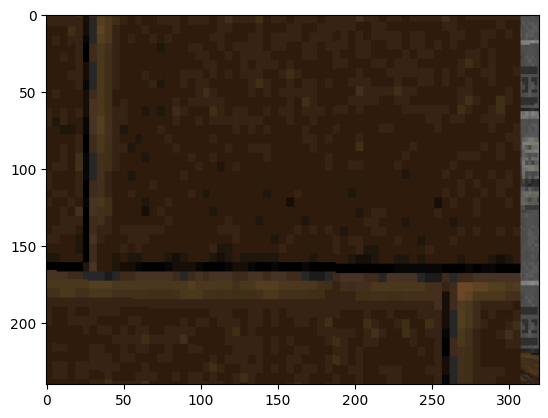

In [55]:
plt.imshow(img[1])

In [56]:
auto_map.shape,img.shape,depth.shape

((23, 240, 320, 3), (21, 240, 320, 3), (21, 240, 320))

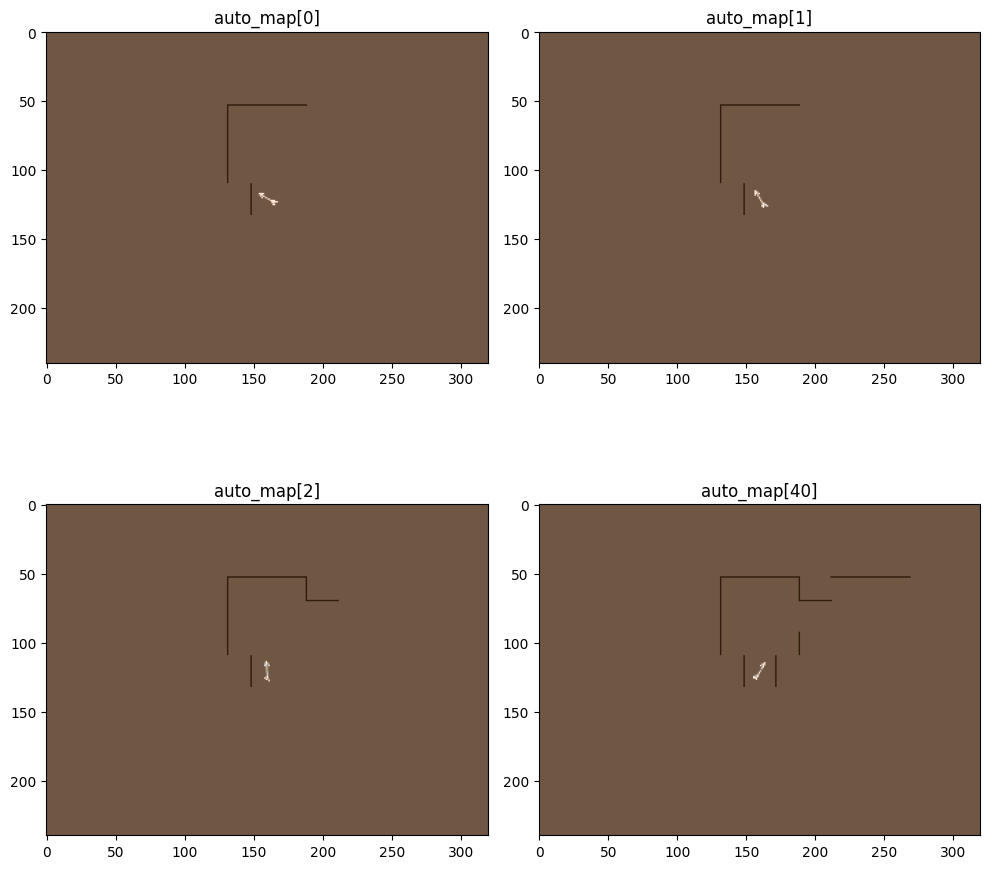

In [68]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.imshow(auto_map[3])
ax1.set_title('auto_map[0]')
ax2.imshow(auto_map[13]) 
ax2.set_title('auto_map[1]')
ax3.imshow(auto_map[23])
ax3.set_title('auto_map[2]')
ax4.imshow(auto_map[33])
ax4.set_title('auto_map[40]')
plt.tight_layout()

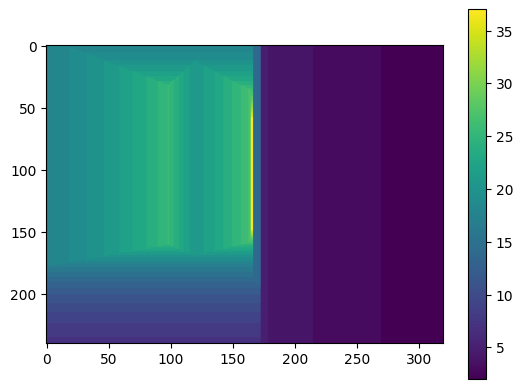

In [76]:
plt.imshow(depth[21])
plt.colorbar()
plt.show()


In [59]:
game_variables

array([[100.        , 464.0980072 , -60.4960022 ,   0.        ,
        181.09313969,   0.        ,   0.        , 464.0980072 ,
        -60.4960022 ,  41.        , 181.09313969,   0.        ,
          0.        ,  90.        ],
       [100.        , 464.0980072 , -60.4960022 ,   0.        ,
        181.09313969,   0.        ,   0.        , 464.0980072 ,
        -60.4960022 ,  41.        , 181.09313969,   0.        ,
          0.        ,  90.        ],
       [100.        , 464.0980072 , -60.4960022 ,   0.        ,
        154.72595218,   0.        ,   0.        , 464.0980072 ,
        -60.4960022 ,  41.        , 154.72595218,   0.        ,
          0.        ,  90.        ],
       [100.        , 464.0980072 , -60.4960022 ,   0.        ,
        119.56970218,   0.        ,   0.        , 464.0980072 ,
        -60.4960022 ,  41.        , 119.56970218,   0.        ,
          0.        ,  90.        ],
       [100.        , 464.0980072 , -60.4960022 ,   0.        ,
         84.41345217

In [172]:
game = vzd.DoomGame()
game.load_config('resources/temp_maps/temp.cfg')
#game.set_doom_scenario_path("resources/temp_maps/deadly_corridor.wad")
#game.set_automap_buffer_enabled(True)
#game.set_automap_mode(vzd.AutomapMode.WHOLE)
#game.set_automap_rotate(False)
#game.set_automap_render_textures(False)
#game.set_depth_buffer_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.init()
game.set_seed(42)
game.new_episode()
state = game.get_state()
#st = state.screen_buffer.transpose(1,2,0)
st = state.screen_buffer
img = np.array([st])  # Initialize as numpy array with first frame
game_variables = np.array([state.game_variables])  # Initialize as numpy array
#am = state.automap_buffer.transpose(1,2,0)
am = state.automap_buffer
auto_map = np.array([am])  # Initialize as numpy array
depth = np.array([state.depth_buffer])  # Initialize as numpy array
s=0
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter('./video{}.avi'.format(1),fourcc,10,(320,240))
game.set_automap_mode(vzd.AutomapMode.OBJECTS)
#am = state.automap_buffer.transpose(1,2,0)
am = state.automap_buffer
auto_map = np.append(auto_map, [am], axis=0)
game.set_automap_mode(vzd.AutomapMode.OBJECTS_WITH_SIZE)
#am = state.automap_buffer.transpose(1,2,0)
am = state.automap_buffer
auto_map = np.append(auto_map, [am], axis=0)
game.set_automap_mode(vzd.AutomapMode.NORMAL)
video.write(st)
for i in range(100):
    rand = np.random.randint(5)
    if i%10==0:
        game.make_action(possible_actions[6])
    else:
        game.make_action(possible_actions[2])
    #game.set_automap_buffer_enabled(True)    
    state = game.get_state()
    #st = state.screen_buffer.transpose(1,2,0)
    st = state.screen_buffer
    img = np.append(img, [st], axis=0)  # Append using np.append
    game_variables = np.append(game_variables, [state.game_variables], axis=0)
    #am = state.automap_buffer.transpose(1,2,0)
    am = state.automap_buffer
    auto_map = np.append(auto_map, [am], axis=0)
    #game.set_automap_buffer_enabled(False)
    depth = np.append(depth, [state.depth_buffer], axis=0)
    video.write(st)
   
game.close()
video.release()

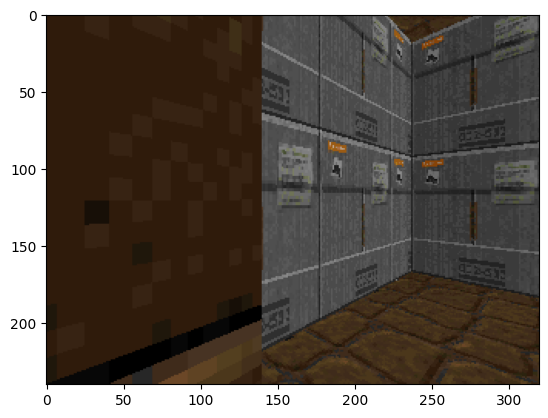

In [173]:
plt.imshow(img[10])
plt.show()


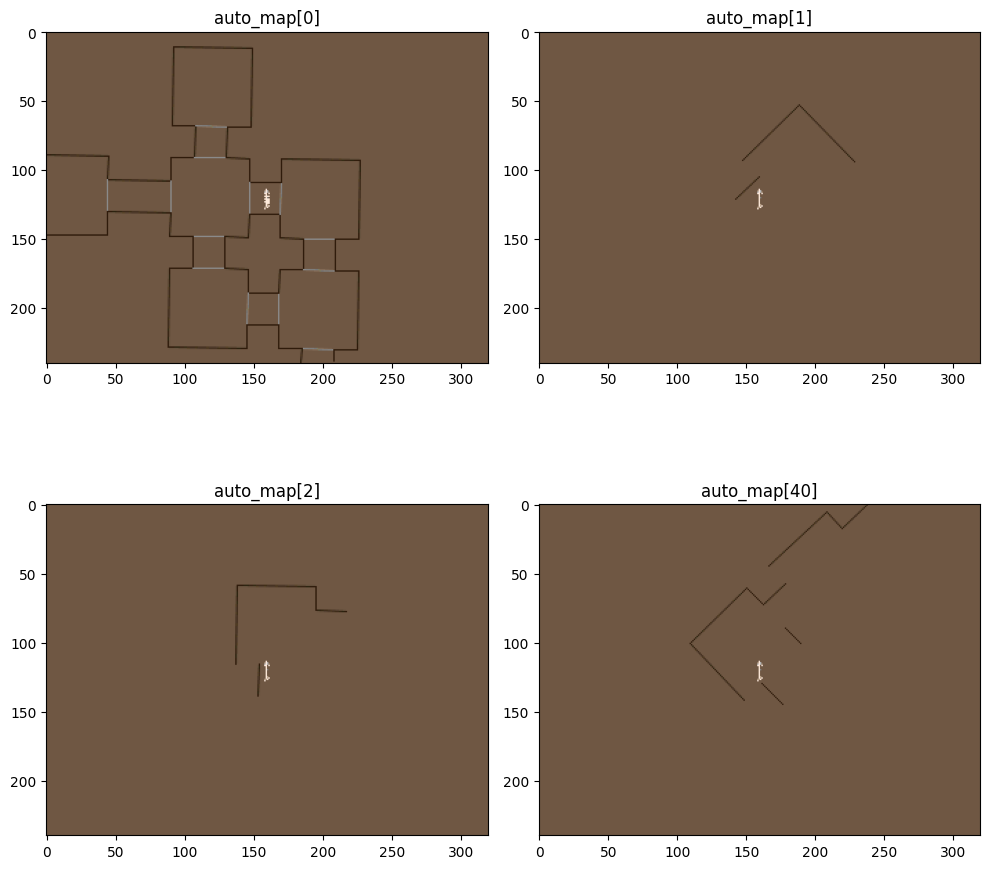

In [175]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.imshow(auto_map[0])
ax1.set_title('auto_map[0]')
ax2.imshow(auto_map[3]) 
ax2.set_title('auto_map[1]')
ax3.imshow(auto_map[13])
ax3.set_title('auto_map[2]')
ax4.imshow(auto_map[23])
ax4.set_title('auto_map[40]')
plt.tight_layout()

In [176]:
print(np.unique(auto_map[0,:,:,0]))
print(np.unique(auto_map[0,:,:,1]))
print(np.unique(auto_map[0,:,:,2]))

[ 43  47  51  55  63  71  79  83  87  91  95 103 111 119 123 127 131 139
 159 183 255]
[ 27  35  43  47  51  59  63  67  71  75  83  87  95  99 107 119 127 131
 135 139 159 183 235]
[ 11  15  19  23  27  35  43  47  51  55  63  67  75  79  87  99 111 119
 127 131 135 139 183 219 223]


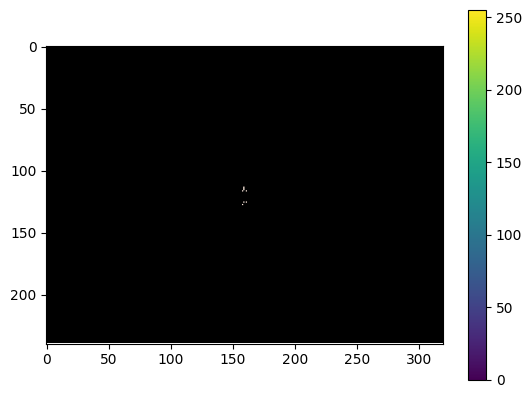

In [177]:
tmp_map = auto_map[0].copy()
tmp_map[tmp_map[:,:,0] != 255] = 0  # Replace all values equal to 255 with 0
tmp_map[tmp_map[:,:,1] != 235] = 0  # Replace all values equal to 235 with 0
tmp_map[tmp_map[:,:,2] != 223] = 0  # Replace all values equal to 223 with 0
plt.imshow(tmp_map)
plt.colorbar()
plt.show()

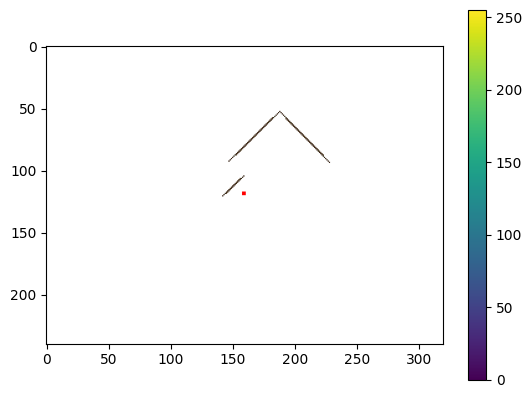

In [178]:
# Replace some values in auto_map[0] with a specific value
tmp_map = auto_map[3].copy()
#tmp_map[tmp_map[:,:,0] == 255] = 30  # Replace all values equal to 255 with 0
#tmp_map[tmp_map[:,:,1] == 235] = 30  # Replace all values equal to 235 with 0
#tmp_map[tmp_map[:,:,2] == 223] = 30  # Replace all values equal to 223 with 0
tmp_map[tmp_map[:,:,0] > 100] = 255  # Replace all values greater than 100 with 255
tmp_map[tmp_map[:,:,1] > 100] = 255  # Replace all values greater than 100 with 255
tmp_map[tmp_map[:,:,2] > 100] = 255  # Replace all values greater than 100 with 255
tmp_map[118:121,158:161,:] = [255,0,0]
# Display the modified image
plt.imshow(tmp_map)
plt.colorbar()
plt.show()


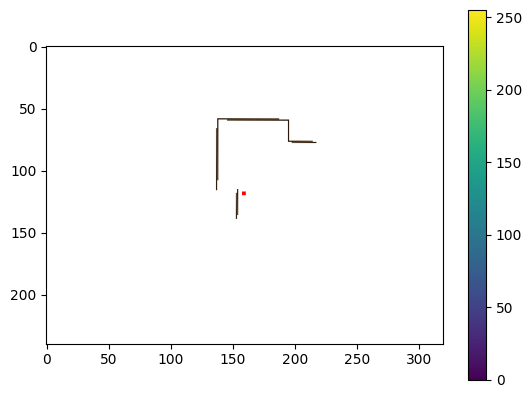

In [179]:
# Replace some values in auto_map[0] with a specific value
tmp_map2 = auto_map[13].copy()
#tmp_map[tmp_map[:,:,0] == 255] = 30  # Replace all values equal to 255 with 0
#tmp_map[tmp_map[:,:,1] == 235] = 30  # Replace all values equal to 235 with 0
#tmp_map[tmp_map[:,:,2] == 223] = 30  # Replace all values equal to 223 with 0
tmp_map2[tmp_map2[:,:,0] > 100] = 255  # Replace all values greater than 100 with 255
tmp_map2[tmp_map2[:,:,1] > 100] = 255  # Replace all values greater than 100 with 255
tmp_map2[tmp_map2[:,:,2] > 100] = 255  # Replace all values greater than 100 with 255
tmp_map2[118:121,158:161,:] = [255,0,0]
# Display the modified image
plt.imshow(tmp_map2)
plt.colorbar()
plt.show()

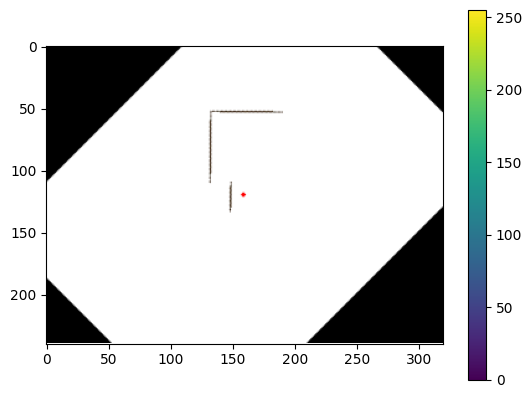

In [182]:
import cv2
import numpy as np

# Get image height, width
(h, w) = tmp_map.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Perform the rotation
M = cv2.getRotationMatrix2D(center, 45, 1.0)
tmp_map3 = tmp_map.copy()
tmp_map3 = cv2.warpAffine(tmp_map3, M, (w, h))
plt.imshow(tmp_map3)
plt.colorbar()
plt.show()


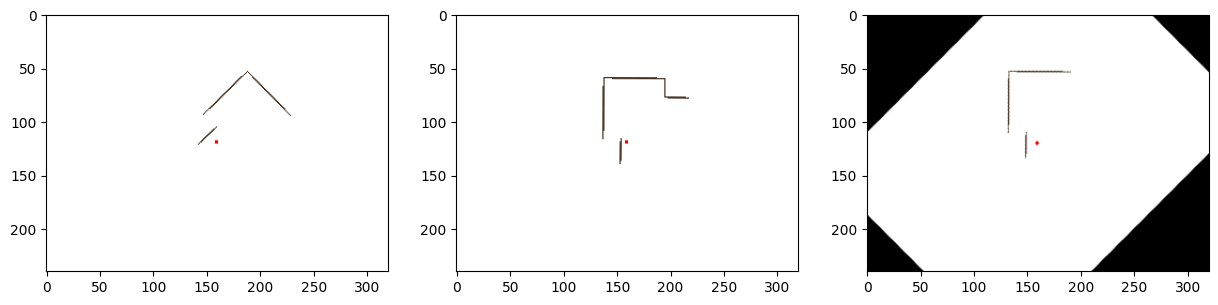

In [183]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(tmp_map)
axs[1].imshow(tmp_map2)
axs[2].imshow(tmp_map3)
plt.show()



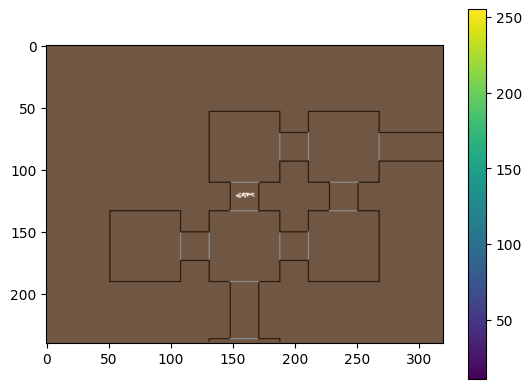

In [88]:
plt.imshow(auto_map[0])
plt.colorbar()


In [40]:
vars = ['HEALTH','POSITION_X','POSITION_Y','POSITION_Z','ANGLE','PITCH','ROLL','CAMERA_POSITION_X','CAMERA_POSITION_Y','CAMERA_POSITION_Z','CAMERA_ANGLE','CAMERA_PITCH','CAMERA_ROLL','CAMERA_FOV']
print(vars)
for i in range(len(game_variables)):
    [print(vars[j],game_variables[i][j],end=' ') for j in range(len(vars))]
    print()
    



['HEALTH', 'POSITION_X', 'POSITION_Y', 'POSITION_Z', 'ANGLE', 'PITCH', 'ROLL', 'CAMERA_POSITION_X', 'CAMERA_POSITION_Y', 'CAMERA_POSITION_Z', 'CAMERA_ANGLE', 'CAMERA_PITCH', 'CAMERA_ROLL', 'CAMERA_FOV']
HEALTH 100.0 POSITION_X 464.09800720214844 POSITION_Y -60.496002197265625 POSITION_Z 0.0 ANGLE 181.09313969060153 PITCH 0.0 ROLL 0.0 CAMERA_POSITION_X 464.09800720214844 CAMERA_POSITION_Y -60.496002197265625 CAMERA_POSITION_Z 41.0 CAMERA_ANGLE 181.09313969060153 CAMERA_PITCH 0.0 CAMERA_ROLL 0.0 CAMERA_FOV 90.0 
HEALTH 100.0 POSITION_X 464.09800720214844 POSITION_Y -60.496002197265625 POSITION_Z 0.0 ANGLE 136.09313968012415 PITCH 0.0 ROLL 0.0 CAMERA_POSITION_X 464.09800720214844 CAMERA_POSITION_Y -60.496002197265625 CAMERA_POSITION_Z 41.0 CAMERA_ANGLE 136.09313968012415 CAMERA_PITCH 0.0 CAMERA_ROLL 0.0 CAMERA_FOV 90.0 
HEALTH 100.0 POSITION_X 463.5354919433594 POSITION_Y -59.95428466796875 POSITION_Z 0.0 ANGLE 136.09313968012415 PITCH 0.0 ROLL 0.0 CAMERA_POSITION_X 463.5354919433594 CAME